<p>
<center>
<b>
<h1>
Accurate Unsupervised Photon Counting from Transition Edge Sensor Signals
</h1>
</b>

<p style="text-align:center">
Nicolas Dalbec-Constant<sup>1</sup>,Guillaume Thekkadath<sup>2</sup>, Duncan England<sup>2</sup>, Benjamin Sussman<sup>2</sup>, Thomas Gerrits<sup>3</sup>, Nicolás Quesada<sup>1</sup>
</p>
</b>

</center>

<p style="text-align:justify;font-size:70%">
<sup>1</sup>Département de génie physique, cole Polytechnique de Montréal, Montréal, QC, H3T 1J4, Canada,
<sup>2</sup> National Research Council of Canada, 100 Sussex Drive, Ottawa, Ontario K1N 5A2, Canada,
<sup>3</sup> National Institute of Standards and Technology, 100 Bureau Drive, Gaithersburg, MD 20899, USA,

</p>
</p>
</p>

We compare methods for signal classification applied to voltage traces from transition edge sensors (TES) which are photon-number resolving detectors fundamental for accessing quantum advantages in information processing, communication and metrology. We quantify the impact of numerical analysis on the distinction of such signals. Furthermore, we explore dimensionality reduction techniques to create interpretable and precise photon number embeddings. We demonstrate that the preservation of local data structures of some nonlinear methods is an accurate way to achieve unsupervised classification of TES traces. We do so by considering a confidence metric that quantifies the overlap of the photon number clusters inside a latent space. Furthermore, we demonstrate that for our dataset previous methods such as the signal's area and principal component analysis can resolve up to 16 photons with confidence above $90\%$ while nonlinear techniques can resolve up to 21 with the same confidence threshold. Also, we showcase implementations of neural networks to leverage information within local structures, aiming to increase confidence in assigning photon numbers. Finally, we demonstrate the advantage of some nonlinear methods to detect and remove outlier signals.

</p>
</p>
</p>

(sec:introduction)=
# Introduction

Photonics is a strong contender for building large-scale quantum information processing systems{cite:p}`arrazola_quantum_2021,slussarenko_photonic_2019,rudolph2017optimistic,bourassa2021blueprint,maring2024versatile`; in many of these systems, photon number detection plays an essential role, serving as a resource for quantum advantage. These detectors can be used, for example, for the heralded generation of non-Gaussian states{cite:p}`takase2024generation,alexander2024manufacturable,yao2022design,chen2024generation,melalkia2023multiplexed,tiedau2019scalability,sonoyama2024generation,endo2024optically`, for the sampling of classically-intractable probability distributions{cite:p}`aaronson2011computational,hamilton2017gaussian,kruse2017limits,deshpande2022quantum,grier2022complexity,madsen2022quantum` or for directly resolving multiple quanta improving the Fisher information of interferometric protocols{cite:p}`thekkadath2020quantum, Wildfeuer:09`. The use of photon number resolving detectors provides a significant advantage as a single detector can determine the number of photons associated with a quantum state accurately{cite:p}`divochiy_superconducting_2008,moraisPreciselyDeterminingPhotonnumber2022a`, without requiring a multiplexed network of threshold detectors with its concomitant complexity and potential inefficiency{cite:p}`kruse2017limits,jonsson2019evaluating,jonsson2020temporal`. Transition edge sensors (TES) have been used for this task, offering resolution over a wide energy range. Resolutions up to 30 photons have been demonstrated{cite:p}`eaton2023`, although typically this quantity is typically lower, on the order of 17, if more straightforward techniques are used{cite:p}`moraisPreciselyDeterminingPhotonnumber2022a`. 

TESs exploit the superconducting phase transition of photosensitive materials to achieve an extremely sensitive calorimeter{cite:p}`irwin_transition-edge_2005`. During operation, the material is cooled below its critical temperature and then current-biased to the transition region between its superconducting and normal state. In this region, the temperature increase following the absorption of a single photon leads to a measurable change in the material's resistance{cite:p}`phillips2020advanced,hadfield2009single`. The resistance change is read-out using a low noise amplifier such as superconducting quantum interference devices (SQUIDs), which also enable the creation of large arrays of TES detectors via read-out multiplexing{cite:p}`irwin_transition-edge_2005`. Optimized materials and coupling techniques have demonstrated efficiencies of up to 98\%{cite:p}`fukuda_titanium-based_2011`. 

The readout of these devices is non-trivial as the quantity one wants to determine, the energy (or the photon number for a fixed frequency), is reflected in a nonlinear fashion in the voltage signal produced by the detectors' electronics{cite:p}`gerrits_extending_2012`. Historically, the integral (area) of the signals has been used to assign photon numbers{cite:p}`moraisPreciselyDeterminingPhotonnumber2022a,Schmidt_Bimodal_2021`. However, distinguishing large photon numbers becomes challenging with this technique. To address this issue, linear techniques such as Principal Component Analysis (PCA) have been used{cite:p}`humphreys_tomography_2015`. A machine learning method, adapted from the K-means algorithm to account for the Poissonian statistics of laser sources, has also been developed{cite:p}`levine_algorithm_2012`. However, these methods' simplicity or assumptions can limit their performance or usability for model-free photon number detection and when measuring non-classical sources, which typically do not have Poisson photon-number statistics.

With the increased popularity of machine learning in the field of signal processing{cite:p}`rajendran_deep_2018` and quantum systems{cite:p}`nautrup_optimizing_2019`, one might naturally ask whether employing more sophisticated methods could lead to enhanced resolution of photon numbers. In this work, we answer this question by assessing the performance of multiple techniques for photon number classification using TES signals. We do so by considering a performance metric named confidence that quantifies the overlap of the signal's probability distribution inside an embedding. We demonstrate that for our dataset previous methods such as the signal's area and PCA can resolve up to 16 photons with confidence above $90\%$ while nonlinear techniques can resolve up to 21 with the same confidence threshold. Furthermore, we also showcase implementations of neural networks to leverage information within local structures, aiming to increase confidence in assigning photon numbers. Finally, we demonstrate the advantage of some nonlinear methods to detect and remove outlier signals. 

# Clustering

Clustering refers to identifying groups of similar samples inside a latent space. For this task we use a Gaussian mixture model, given a user-defined number of clusters, this method finds the parameters of a mixture of Gaussians to describe the sample's distribution.

The choice is highly inspired by a similar model previously used in the tomography of TESs in combination with PCA{cite:p}`humphreys_tomography_2015`. Mixture models offer a statistical interpretation of latent spaces convenient for metrology and performance evaluation. 

The mixture model gives a continuous probability density function for the position $s$ of samples given optimal parameters $\theta=\{(\omega_k, \mu_k$, $\Sigma_k):k=1,\cdots,K\}$. In the model, every cluster $k$ is weighted by a value $\omega_k$ (where $\sum_{k=1}^K \omega_k = 1$), and modelled by a Gaussian with mean $\mu_k$ and covariance matrices $\Sigma_k$. The individual Gaussians $\mathcal{N}$ give the cluster probability density function and the probability of observing samples in position $s$ given parameters $\theta$ are defined by

$$
p(s|\theta) = \sum_{k=1}^K \omega_k \mathcal{N}(s|\mu_k , \Sigma_k).
$$

The probability density function is found through an expectation maximization algorithm (EM algorithm) that attempts to find the maximum likelihood estimate of samples following a likelihood of  

$$
\mathcal{L}(\theta) = \prod_{i=1}^p \sum_{k=1}^K \omega_k \mathcal{N}(s_i|\mu_k , \Sigma_k).
$$

Numerically it is more convenient to express this problem in terms of the log-likelihood given by 

$$
\ell(\theta) = \log(\mathcal{L}(\theta)) = \sum_{i=1}^p \log\left(\sum_{k=1}^K \omega_k \mathcal{N}(s_i|\mu_k , \Sigma_k)\right),
$$

where the problem can be computed in terms of sum instead of products.


# Quality Assessment

Assessing the performance of dimensionality reduction techniques in an unsupervised setting is difficult since the ground truth is unknown. To tackle this task, we quantify cluster separation. To improve the performance evaluation it is also important to understand that the problem is not completely unsupervised considering photon sources used to generate samples follow known distributions. We include this knowledge of photon number distributions as an additional validation to cluster separation evaluation in the confidence metric. 


## Confidence

We consider the probability density of photon events can be approximated from the sample's distribution in the latent space following the Gaussian mixture model. Following previous work{cite:p}`humphreys_tomography_2015`, the confidence $C_n$ is used as a performance metric for the resolution of photon numbers in a latent space following,

$$
C_n = \int_{-\infty}^{\infty} \frac{p(s|n)^2 P(n)}{\sum_k p(s|k) P(k)} \mathrm{d} s.
$$

In this equation, $p(s|n)$ is the probability density of observing a sample in position $s$ in the latent space given it is labelled as $n$ photons. Additionally, $P(n)$ is the probability of assigning a photon number $n$. In this model, we consider that the true clusters follow a Gaussian structure inside the latent space. The confidence represents the probability of correctly labelling a sample in a given cluster in the mixture model. We note that that confidence equation describes the confidence for a one-dimensional space but can be generalized to an arbitrarily high-dimensional latent space. It is important to mention that the distances in the latent space do not necessarily have a physical meaning. The separation must only be interpreted as our capacity to distinguish clusters, and the confidence translates this concept into a probabilistic framework.


## Datasets

Experimental data from previous work at the National Institute of Standards and Technologies (NIST) is used to benchmark the different techniques in this work{cite:p}`gerrits_extending_2012`. The original dataset was generated by progressively attenuating a coherent source from 29dB to 7dB, leading to 24 datasets each containing $u=20\,480$ signals and $t=8\,192$ time steps. This results in datasets that each have Poisson photon number distributions and mean photon number $\langle n_1 \rangle=2.26$ to $\langle n_{24} \rangle=7.08\times 10^6$. These values were independently measured using a calibrated photodetector. 

Instead of directly using these distributions, we construct two synthetic datasets (made of real traces) that follow a close-to-uniform and close-to-geometric distributions $P(n)$. These datasets are labelled as Synthetic Uniform and Synthetic Geometric. Furthermore, for both of these datasets, a training and testing set were generated. Considering randomly selecting a portion of the samples in each experiment is equivalent to varying the weight $w_{{\langle n \rangle}}$ of a given Poisson distribution $P_{{\langle n \rangle}}(n)$ inside a mixture of Poisson distributions. The total expected distribution $P(n)$ can be described by

$$
P(n) = \frac{1}{\xi} \sum_{\langle n \rangle\in \bar{N}} w_{\langle n \rangle} P_{\langle n \rangle}(n),
$$

with

$$
\xi = \sum_{\langle n \rangle \in \bar{N}} w_{\langle n \rangle},
$$

and where $\bar{N}$ is the set of available mean photon numbers $\langle n \rangle$. With this construction, the expected photon number distribution is a mixture of Poisson distributions. The choice of a uniform distribution is motivated by the desire to make the labelling task difficult by maximizing the distribution's entropy. In other words, for every sample in a perfectly uniform distribution, the method would have equal chances of guessing every class. The choice of testing a geometric distribution comes from the desire to precisely measure thermal optical sources that follow a geometric photon number distribution. Also, distributions with a long tail can be difficult to process for certain methods since fewer examples are present in some classes (imbalanced dataset).

We add that these expected distributions are used as $P(n)$ in the computation of the confidence. The predictive methods are trained with the training set, and the analysis of performance metrics is done by feeding the test set to the trained methods. In the case of non-predictive and basic feature methods, the test set is directly used. The training and test datasets contain a total of $u=30\,550$ traces of size $t=350$ (first $350$ values of the $8192$ available time steps). We note that most of the weights $w_{\braket{n}}$ are set to zero because of the number of available Poisson distributions in the desired photon number range is small, making the synthetic distribution not perfectly uniform.

To validate the hypothesis that more training data can help parametric implementations of t-SNE and UMAP resemble there non-parametric equivalent, we also use a larger dataset named Synthetic Large that was created using signals generated by TESs at the National Research Council Canada (NRC) in Ottawa. The data was generated by tuning the attenuation of a laser and measuring $u=100 \,000$ signals for each of these coherent sources.

# Results

We present the confidence result for the different datasets and considering a variety of dimensionality reduction techniques.

In [1]:
from src.Utils import plot_results

## Synthetic Uniform

In [2]:
config_uniform = {
                'MAX.npy' : {'Name' : 'Max', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [0,11]},
                'AREA.npy' : {'Name' : 'Area', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [1,22]},
                'PCA 1D.npy' : {'Name' : 'PCA 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [0,20]},
                'PCA 2D.npy' : {'Name' : 'PCA 2D', 'color' : '#6D7680', 'line' : '-', 'n_photons' : [0,20]},
                # 'KPCA RBF 2D.npy' : {'Name' : 'PCA RBF 2D', 'color' : '#6D7680', 'line' : 'dotted', 'n_photons' : [0,18]},
                # 'KPCA Sig.npy' : {'Name' : 'PCA Sig. 2D', 'color' : '#6D7680', 'line' : 'dashed', 'n_photons' : [0,17]},
                # 'KPCA Cos.npy' : {'Name' : 'PCA Cos. 2D', 'color' : '#6D7680', 'line' : '-', 'n_photons' : [0,7]},
                # 'NMF 1D.npy' : {'Name' : 'NMF 1D', 'color' : '#6D7680', 'line' : '-', 'n_photons' : [0,23]},
                'ISO 1D.npy' : {'Name' : 'Isomap 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [0,22]},
                'tSNE 1D.npy' : {'Name' : 't-SNE 1D', 'color' : '#E0607E', 'line' : (0, (1, 1)), 'n_photons' : [0,23]},
                'tSNE 2D.npy' : {'Name' : 't-SNE 2D', 'color' : '#E0607E', 'line' : '-',  'n_photons' : [0,23]},
                'UMAP 1D.npy' : {'Name' : 'UMAP 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)),  'n_photons' : [0,26]},
                'UMAP 2D.npy' : {'Name' : 'UMAP 2D', 'color' : '#6D7680', 'line' : '-',  'n_photons' : [0,25]},
                'PTSNE 1D.npy' : {'Name' : 'Param. t-SNE 1D', 'color' : '#79AEA3', 'line' : (0, (1, 1)), 'n_photons' : [0,23]},
                'PUMAP 1D.npy' : {'Name' : 'Param. UMAP 1D', 'color' : '#79AEA3', 'line' : (0, (1, 1)), 'n_photons' : [0,23]},
                }

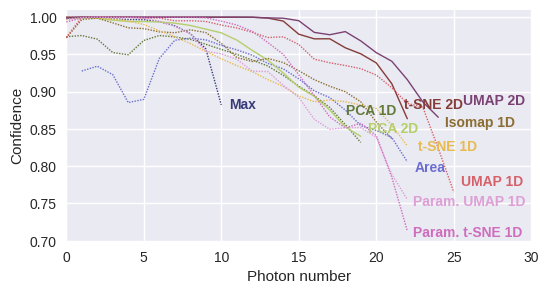

In [3]:
plot_results(config = config_uniform,
            pad = 0.5,
            xlim = (0,30),
            ylim = (0.7,1.01),
            yscale = 'linear',
            path_results = r'src/Results_Uniform/')

## Synthetic Geometric

In [4]:
config_geometric = {'MAX 1D.npy' : {'Name' : 'Max', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [0,12]},
                'AREA 1D.npy' : {'Name' : 'Area', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [1,19]},
                'PCA 1D.npy' : {'Name' : 'PCA 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [0,17]},
                'PCA 2D.npy' : {'Name' : 'PCA 2D', 'color' : '#6D7680', 'line' : '-', 'n_photons' : [0,17]},
                # 'KPCA RBF 2D.npy' : {'Name' : 'PCA RBF 2D', 'color' : '#6D7680', 'line' : 'dotted', 'n_photons' : [0,18]},
                # 'KPCA Sig 2D.npy' : {'Name' : 'PCA Sig. 2D', 'color' : '#6D7680', 'line' : 'dashed', 'n_photons' : [0,17]},
                # 'KPCA Cos 2D.npy' : {'Name' : 'PCA Cos. 2D', 'color' : '#6D7680', 'line' : '-', 'n_photons' : [0,7]},
                # 'NMF 1D 1D.npy' : {'Name' : 'NMF 1D', 'color' : '#6D7680', 'line' : '-', 'n_photons' : [0,23]},
                'ISO 1D.npy' : {'Name' : 'Isomap 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [0,20]},
                'tSNE 1D.npy' : {'Name' : 't-SNE 1D', 'color' : '#E0607E', 'line' : (0, (1, 1)), 'n_photons' : [0,20]},
                'tSNE 2D.npy' : {'Name' : 't-SNE 2D', 'color' : '#E0607E', 'line' : '-',  'n_photons' : [0,20]},
                'UMAP 1D.npy' : {'Name' : 'UMAP 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)),  'n_photons' : [0,20]},
                'UMAP 2D.npy' : {'Name' : 'UMAP 2D', 'color' : '#6D7680', 'line' : '-',  'n_photons' : [0,20]},
                'PTSNE 1D.npy' : {'Name' : 'Param t-SNE 1D', 'color' : '#79AEA3', 'line' : (0, (1, 1)), 'n_photons' : [0,15]},
                'PUMAP 1D.npy' : {'Name' : 'Param UMAP 1D', 'color' : '#79AEA3', 'line' : (0, (1, 1)), 'n_photons' : [0,12]},
        }

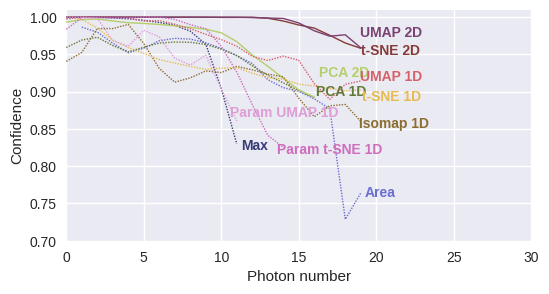

In [5]:
plot_results(config = config_geometric,
            pad = 0.5,
            xlim = (0,30),
            ylim = (0.7,1.01),
            yscale = 'linear',
            path_results = r'src/Results_Geometric/')

## Effect of Gaussian Mixture

Considering the embedding created by t-SNE is better modelled by a generalized gaussian function. To demonstrate the impact of the clustering function, we present the confidence for t-SNE modelled using a gaussian vs generalised gaussian model.

In [6]:
config_uniform_gauss = {
                'tSNE 1D genGauss 1D.npy' : {'Name' : 't-SNE 1D\nGeneralized Gaussians', 'color' : '#E0607E', 'line' : (0, (1, 1)), 'n_photons' : [0,20]},
                'UMAP 1D.npy' : {'Name' : 'UMAP 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)),  'n_photons' : [0,20]},
                'tSNE 1D.npy' : {'Name' : 't-SNE 1D\nGaussians', 'color' : '#E0607E', 'line' : (0, (1, 1)), 'n_photons' : [0,20]},
                'tSNE 2D.npy' : {'Name' : 't-SNE 2D', 'color' : '#E0607E', 'line' : '-',  'n_photons' : [0,20]},
        }

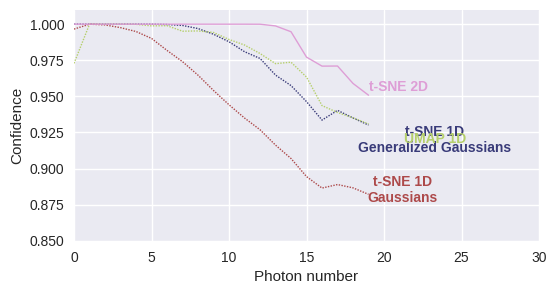

In [7]:
plot_results(config = config_uniform_gauss,
            pad = 0.5,
            xlim = (0,30),
            ylim = (0.85,1.01),
            yscale = 'linear',
            path_results = r'src/Results_Uniform/')

## Synthetic Large

In [8]:
config_large = {
                'AREA.npy' : {'Name' : 'Area', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [1,19]},
                'PCA 1D.npy' : {'Name' : 'PCA 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)), 'n_photons' : [0,17]},
                'UMAP 1D.npy' : {'Name' : 'UMAP 1D', 'color' : '#6D7680', 'line' : (0, (1, 1)),  'n_photons' : [0,20]},
                'PUMAP 1D.npy' : {'Name' : 'Param UMAP 1D', 'color' : '#79AEA3', 'line' : (0, (1, 1)), 'n_photons' : [0,18]},
        }

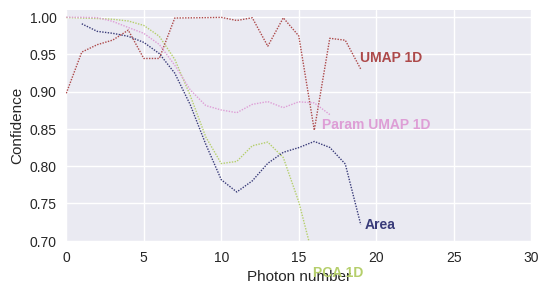

In [9]:
plot_results(config = config_large,
            pad = 0.5,
            xlim = (0,30),
            ylim = (0.7,1.01),
            yscale = 'linear',
            path_results = r'src/Results_Large/')

```{bibliography}
:style: unsrt
```